## Template matching with multiple matching templates in the Target
Raghuttam Hombal<br>2K20E22
#### Question 1. Finding Windows in Church

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Reading the Image and displaying the Target image for reference

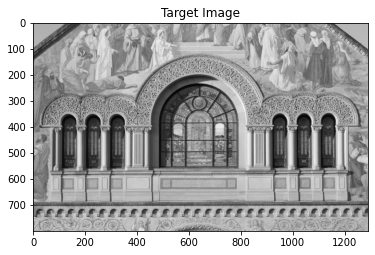

In [19]:
target = cv2.imread("church.png")
target = cv2.cvtColor(target,cv2.COLOR_BGR2GRAY)
template = cv2.imread("window.png")
template = cv2.cvtColor(template,cv2.COLOR_BGR2GRAY)
plt.imshow(target,cmap='gray')
plt.title("Target Image")
plt.show()

This function does the template matching using correlation technique
$$P_{i+\frac{N}{2},y+\frac{N}{2}} = \sum \frac{(\overline{I}-I)(\overline{T}-T)}{\sqrt{\sigma_{I}^{2}\sigma_{T}^{2}}}$$

In [20]:
def location_finder(target,template):
    loc=np.zeros(target.shape)
    template_mean = np.mean(np.mean(template))
    delta_template = template-template_mean
    for i in range(0,target.shape[0]-template_size[0]):
        for j in range(0,target.shape[1]-template_size[1]):
            loc[i+int(template_size[0]/2)][j+int(template_size[1]/2)] = np.sum(
                (np.mean(np.mean(target[i:i+template_size[0],j:j+template_size[1]])
                        )-target[i:i+template_size[0],j:j+template_size[1]]
                )*delta_template)/np.sqrt(
                np.std(target[i:i+template_size[0],j:j+template_size[1]])**2*np.std(
                    delta_template)**2)
    return loc


We call the function to get the Location matrix and obtain the absolute value of the Matrix to give us the location where ever there are peaks

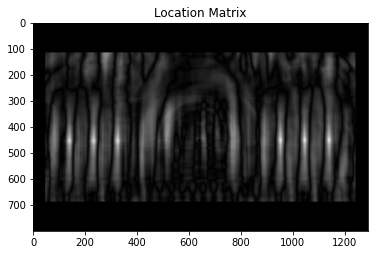

In [21]:
template_size = template.shape
location = location_finder(target.copy(),template.copy())
plt.imshow(np.abs(location),cmap='gray')
plt.title("Location Matrix")
plt.show()

We try obtaining the location using a criteria that the match is above 85%, I tried it for 95% but the location doesn't seems to be there in that range

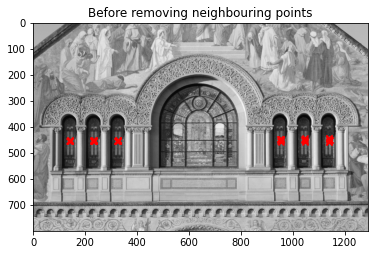

In [22]:
y,x=np.nonzero(np.logical_and(np.abs(location)>
                              np.amax(np.abs(location))*0.85,np.abs(location)<
                              np.amax(np.abs(location))*0.86))
plt.imshow(target,cmap='gray')
plt.scatter(x,y,color='red',marker='x')
plt.title("Before removing neighbouring points")
plt.show()

We can observe that there are number of points that are very near to the each other overlapping the same window location,<br>
Hence we try to filter it out using method of rejecting a point if it is very close to anyother points<br>
The criteria of distances I chose are $\pm3$ in X-axis and $\pm2$ in Y-axis

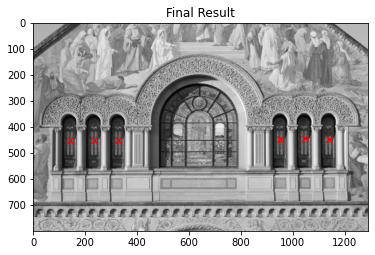

In [23]:
revised_x,revised_y=[],[]
for k in range(len(x)):
    for l in range(len(x)):
        if np.abs(y[k]-y[l])>5 and (y[k] not in revised_y and y[k]+1 not in revised_y and y[k]+2 not in revised_y):
            if np.abs(x[k]-x[l])>50 and (x[k] not in revised_x and x[k]+1 not in revised_x and x[k]+2 not in revised_x and
                                        x[k]+5 not in revised_x and x[k]+4 not in revised_x and x[k]+3 not in revised_x and
                                        x[k] not in revised_x and x[k]-1 not in revised_x and x[k]-2 not in revised_x):
                revised_x.append(x[k])
                revised_y.append(y[k])
plt.imshow(target,cmap='gray')
plt.scatter(revised_x,revised_y,marker='x',color='red')
plt.title("Final Result")
plt.savefig("Window_result.png")
plt.show()

In [24]:
print("Number of Window locations obtained before filtering => ",len(x))
print("Number of Window locations obtained after filtering => ",len(revised_x))

Number of Window locations obtained before filtering =>  46
Number of Window locations obtained after filtering =>  6


#### Question 2. Finding a letter in Image

In [25]:
def location_finder(target,template):
    loc=np.zeros(target.shape)
    template_size=template.shape
    for i in range(0,target.shape[0]-template_size[0]):
        for j in range(0,target.shape[1]-template_size[1]):
            if template_size[0]%2==0 and template_size[1]%2!=0:
                loc[i+int(template_size[0]/2)][j+int(template_size[1]/2)] = np.sum(
                    target[i:i+template_size[0],j:j+template_size[1]]*template)
            elif template_size[0]%2==0 and template_size[1]%2==0:
                loc[i+int(template_size[0]/2)][j+int(template_size[1]/2)] = np.sum(
                    target[i:i+template_size[0],j:j+template_size[1]]*template)
            elif template_size[0]%2!=0 and template_size[1]%2==0:
                loc[i+int(template_size[0]/2)][j+int(template_size[1]/2)] = np.sum(
                    target[i:i+template_size[0],j:j+template_size[1]]*template)
            else:
                loc[i+int(template_size[0]/2)][j+int(template_size[1]/2)] = np.sum(
                    target[i:i+template_size[0],j:j+template_size[1]]*template)

    return loc

In [33]:
def template_finder(target,template):
    target = cv2.imread(target)
    target = cv2.cvtColor(target,cv2.COLOR_BGR2GRAY)
    template = cv2.imread(template)
    template = cv2.cvtColor(template,cv2.COLOR_BGR2GRAY)
    template_size = template.shape
    location = np.abs(location_finder(target.copy(),template.copy()))
    location = np.nan_to_num(location)
    y,x=np.nonzero(np.abs(location)>np.amax(np.abs(location))*0.97)

    plt.imshow(target,cmap='gray')
    plt.scatter(x,y,color='red',marker='x')
    plt.title("Locations Matched")
    plt.show()
    
    return (x,y)

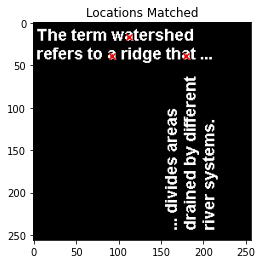

In [34]:
temp = template_finder('text.png','temp.png')

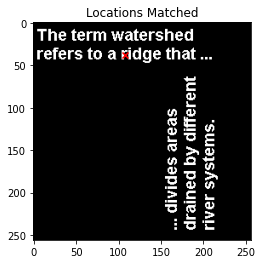

In [35]:
temp = template_finder('text.png','temp2.png')

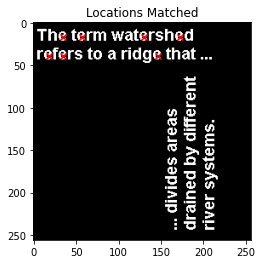

In [36]:
temp = template_finder('text.png','temp3.png')

#### Trying to Rotate and Match
I chose to rotate the target as we can apply a single method even for a varied shape of template.

In [37]:
#It is necessary to rotate the image back as we match the template
#to rotated image but we would like to visualize it naturally
def rotate_img_rev(t):
    x=np.zeros(t.shape[::-1])
    for i in range(t.shape[0]):
        for j in range(t.shape[1]):
            x[i,j] = t[j][t.shape[0]-1-i]
    return x


def rotate_img(t):
    x=np.zeros(t.shape[::-1])
    for i in range(t.shape[0]):
        for j in range(t.shape[1]):
            x[i,j] = t[t.shape[1]-j-1][i]
    return x

In [50]:
def template_finder(target,template):
    target = cv2.imread(target)
    target = cv2.cvtColor(target,cv2.COLOR_BGR2GRAY)
    template = cv2.imread(template)
    template = cv2.cvtColor(template,cv2.COLOR_BGR2GRAY)
    template_size = template.shape
    location = np.abs(location_finder(target.copy(),template.copy()))
    location = np.nan_to_num(location)
    y,x=np.nonzero(np.abs(location)>np.amax(np.abs(location))*0.97)

    #Rotating the Template and repeating the same process
    rot_target = rotate_img(target.copy())
    location = np.abs(location_finder(rot_target.copy(),template.copy()))
    location = np.nan_to_num(location)
    location = rotate_img_rev(location.copy())
    yr,xr=np.nonzero(np.abs(location)>np.amax(np.abs(location))*0.98)
    plt.imshow(target,cmap='gray')
    plt.scatter(x,y,color='red',marker='x')
    plt.scatter(xr,yr,color='red',marker='x')

    plt.show()
    
    return (x,y)

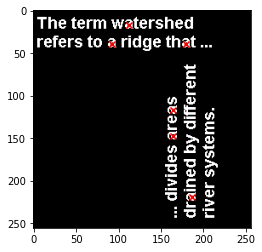

In [51]:
temp = template_finder('text.png','temp.png')

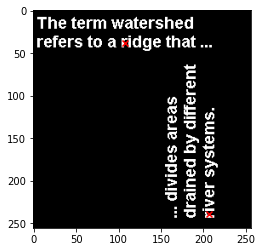

In [52]:
temp = template_finder('text.png','temp2.png')

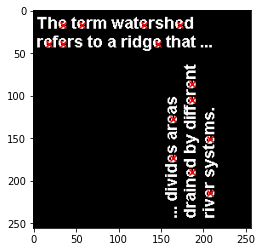

In [53]:
temp = template_finder('text.png','temp3.png')